# 퍼셉트론으로 손글씨(숫자) 인식을 하자

1. 퍼셉트론을 사용했을때 손글씨를 얼마나 하는지 알아보자퍼셉트론은 
2. 선형모델이기에 모델을 만들고 개선이 힘들수 있다.

In [2]:
#버전확인

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.9.1
2.9.0


텐서플로우의 라이브러리인 keras의 MNIST라는 이미지 데이터를 사용한다. 

In [3]:
#데이터 준비

#텐서플로우의 keras에서 mnist데이터 셋을 가져오자
mnist = tf.keras.datasets.mnist

# train, test set 설정
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#로드한 데이터 정보 확인
print('x_train.shape:',x_train.shape) #28x28 이미지 60000장이 들어옴
print('y_train.shape',y_train.shape)  #각 이미지에 대한 라벨링된 정보

x_train.shape: (60000, 28, 28)
y_train.shape (60000,)


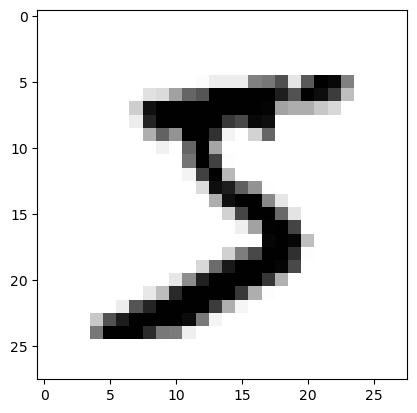

In [3]:
#로드한 이미지 시각화 =>어떤이미지가 들어왔을까?

# x값
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [4]:
# x값에 라벨링된 'y값'
print(y_train[0])

5


### 위의 같은 데이터가 60000장 있을때 손글씨를 인실할 수 있는 모델을 만들어보자

참고)각 이미지에 대한 데이터는 0~225로 표현된다.하지만 신경망의 activation function은 대게 tang, sigmoid등을 사용하는데 이들은 0~1값을 선호한다. 따라서 각 이미지데이터의 값을 normalized하자 

In [4]:
#데이터 전처리

x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
#모델 생성
import tensorflow as tf
from tensorflow import keras
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  #flatten: 2차원 행렬을 펼쳐서 1차원 array로 사용함
  tf.keras.layers.Dense(10, activation='softmax') #출력이 10개있도록 dense하게(input을 모두사용)  activation함수는 'softmax'를 사용하자
])                                                #softmax: 출력된 확률값중 가장 큰것을 사용                  

model.compile(optimizer='adam',                       #adam : 공부하자(경사하강법 사용을 위한것, 최근에 adam이 가장 좋다)  
              loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy: 공부하자(손실함수를 알고싶을때 사용)
              metrics=['accuracy'])                   #accuracy: 공부하자(정확도를 알고싶을때 넣자)

In [6]:
#모델 학습

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 1ms/step - loss: 0.4707 - accuracy: 0.8759
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3038 - accuracy: 0.9156
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2833 - accuracy: 0.9213
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9236
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2664 - accuracy: 0.9261
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2623 - accuracy: 0.9267
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2585 - accuracy: 0.9282
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2557 - accuracy: 0.9291
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2533 - accuracy: 0.9298
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.251

 최적화개념으로 경사하강법(adam)과 손실함수를sparse_categorical_crossentropy 적용한 모델 6만장을 학습하는데 24.1초가 걸렸으며 손실함수는 점점 줄어드는것을 확인함

In [7]:
#모델 평가
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2649 - accuracy: 0.9273


[0.2649310529232025, 0.927299976348877]

In [8]:
# 모델 저장
from keras.models import load_model
model.save('model/5.3_writter.h5')

In [9]:
# 모델 로드

from keras.models import load_model
model = load_model('model/5.3_writter.h5')